<a href="https://colab.research.google.com/github/MarcosRoms/Deep_learning_colab/blob/main/Ejemplo_4_Aumentaci%C3%B3n_y_Pre_procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio cargar y mostrar una imagen

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


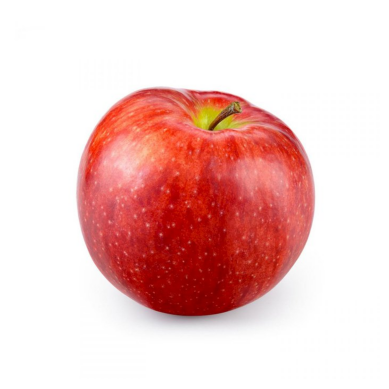

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Cargar la imagen
img_path = r'/content/manzana.jpg'  # Cambia esta ruta a la ubicación de tu imagen
img = image.load_img(img_path)

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.show()


## Redimensionar una imagen

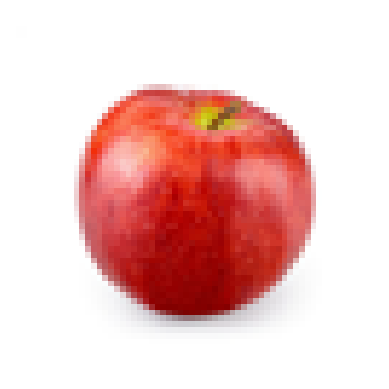

In [14]:
# Redimensionar la imagen
img_resized = img.resize((64, 64))

# Mostrar la imagen redimensionada
plt.imshow(img_resized)
plt.axis('off')
plt.show()

## Convertir una imagten a un array y normalizarla


In [20]:
import numpy as np

# Convertir la imagen a un array de Numpy
img_array = image.img_to_array(img)

# Normalizar los valores de los píxeles a [0, 1]
img_array = img_array / 255.0

print(f"Array de la imagen normalizado: {img_array}")


Array de la imagen normalizado: [[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[1.         1.         1.        ]
  [1.

## Aplicar rotación a una imagen

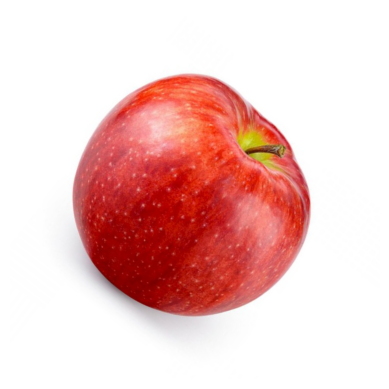

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Crear un generador de imágenes con rotación
datagen = ImageDataGenerator(rotation_range=40)

# Convertir la imagen a un formato compatible con el generador
img_array = np.expand_dims(img_array, axis=0)

# Generar una imagen rotada
img_rotated = next(datagen.flow(img_array, batch_size=1))[0]

# Mostrar la imagen rotada
plt.imshow(img_rotated)
plt.axis('off')
plt.show()


## Aplicar un recorte  aleatorio a la imagen

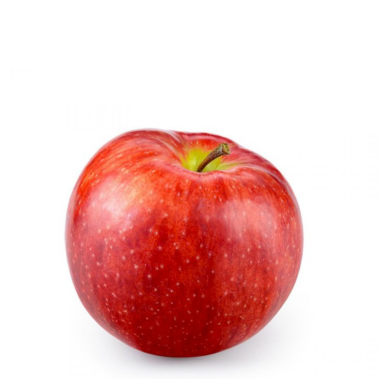

In [12]:
# Asegurarse de que img_array tiene la forma (1, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Crear un generador de imágenes con recorte
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

# Generar una imagen recortada
img_cropped = next(datagen.flow(img_array, batch_size=1))[0]

# Mostrar la imagen recortada
plt.imshow(img_cropped)
plt.axis('off')
plt.show()

## Aplicar zoom aleatorio a la imagen recortada

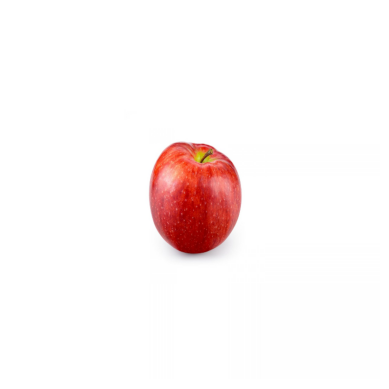

In [22]:

# Suponiendo que img_array ya está definido y normalizado
# Asegurarse de que img_array tiene la forma (1, height, width, channels)
# img_array = np.expand_dims(img_array, axis=0)

# Crear un generador de imágenes con zoom
datagen = ImageDataGenerator(zoom_range=2)

# Generar una imagen con zoom
img_zoomed = next(datagen.flow(img_array, batch_size=1))[0]

# Mostrar la imagen con zoom
plt.imshow(img_zoomed)
plt.axis('off')
plt.show()


## Aplicar un desplazamiento horizontal y vertical a la imagen

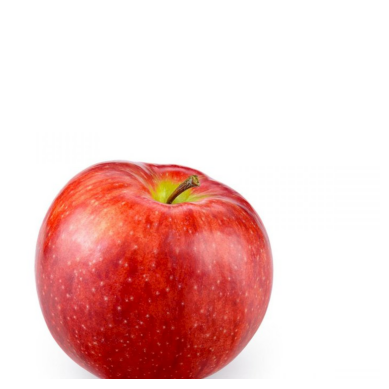

In [23]:
# Crear un generador de imágenes con desplazamiento horizontal y vertical
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

# Generar una imagen desplazada
img_shifted = next(datagen.flow(img_array, batch_size=1))[0]

# Mostrar la imagen desplazada
plt.imshow(img_shifted)
plt.axis('off')
plt.show()

Ampliación de Datos (Data Augmentation)

La ampliación de datos es una técnica utilizada en el aprendizaje automático y el reconocimiento de imágenes para aumentar la cantidad y la diversidad de los datos de entrenamiento mediante la aplicación de diversas transformaciones a las imágenes originales. Esto ayuda a mejorar la capacidad del modelo para generalizar a nuevos datos y reduce el sobreajuste (overfitting).

Lo que se vio anteriormente es un ejemplo de esto, sin embargo en una implementacion de con Keras se veria de la siguiente manera

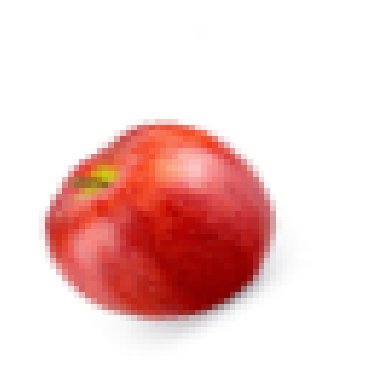

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Cargar la imagen
img_path = r'/content/manzana.jpg' # Cambia esta ruta a la ubicación de tu imagen
img = image.load_img(img_path)

# Redimensionar la imagen para asegurar un tamaño uniforme
img_resized = img.resize((64, 64))

# Convertir la imagen a un array de Numpy
img_array = image.img_to_array(img_resized)
img_array = img_array / 255.0  # Normalizar los valores de los píxeles a [0, 1]

# Expandir las dimensiones de la imagen para que tenga la forma (1, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Crear un generador de imágenes con varias transformaciones
datagen = ImageDataGenerator(
    rotation_range=45,             # Rotación aleatoria en el rango de 0 a 45 grados
    width_shift_range=0.2,         # Desplazamiento horizontal aleatorio
    height_shift_range=0.2,        # Desplazamiento vertical aleatorio
    zoom_range=0.5,                # Zoom aleatorio
    horizontal_flip=True,          # Volteo horizontal aleatorio
    vertical_flip=True             # Volteo vertical aleatorio
)

# Generar una imagen transformada
img_transformed = next(datagen.flow(img_array, batch_size=1))[0]

# Mostrar la imagen transformada
plt.imshow(img_transformed)
plt.axis('off')
plt.show()


## Otras Herramientas para Ampliación de Datos

Además de Keras, existen otras herramientas poderosas para la ampliación de datos, como:

Albumentations
Albumentations es una biblioteca rápida y flexible para la ampliación de datos de imágenes. Proporciona una amplia variedad de transformaciones y es conocida por su eficiencia. Aquí tienes un ejemplo de cómo usar Albumentations:

In [25]:
import cv2
import albumentations as A
import matplotlib.pyplot as plt

# Cargar la imagen
img_path = r'/content/manzana.jpg'  # Cambia esta ruta a la ubicación de tu imagen
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

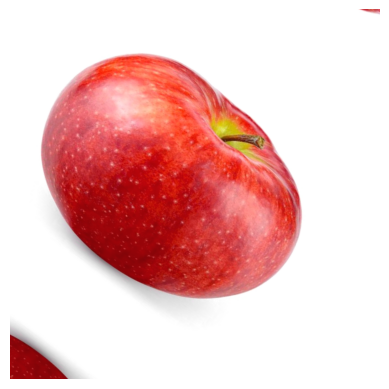

In [26]:


# Definir las transformaciones
transform = A.Compose([
    A.RandomRotate90(),         # Rotación aleatoria de 90 grados
    A.Flip(),                   # Volteo horizontal y vertical
    A.Transpose(),              # Transponer la imagen
    A.OneOf([
        A.MotionBlur(p=0.2),    # Desenfoque de movimiento
        A.MedianBlur(blur_limit=3, p=0.1),  # Desenfoque mediano
        A.Blur(blur_limit=3, p=0.1),        # Desenfoque
    ], p=0.2),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
    A.RandomBrightnessContrast(p=0.2),  # Cambio aleatorio de brillo y contraste
    A.HueSaturationValue(p=0.3),  # Cambio aleatorio de hue, saturación y valor
])

# Aplicar las transformaciones
transformed = transform(image=img)
img_transformed = transformed['image']

# Mostrar la imagen transformada
plt.imshow(img_transformed)
plt.axis('off')
plt.show()
